C:\Users\praveen kumar\AppData\Local\Temp\ipykernel_19352\3268164514.py:21: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Dataset Loaded Successfully
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


C:\Users\praveen kumar\AppData\Local\Temp\ipykernel_19352\3268164514.py:43: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


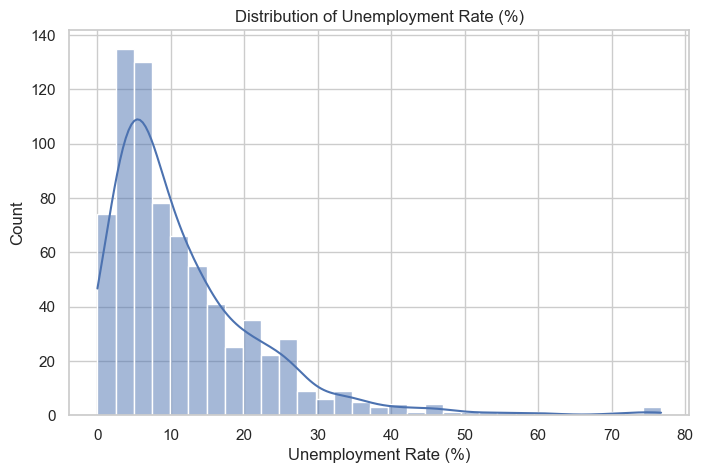

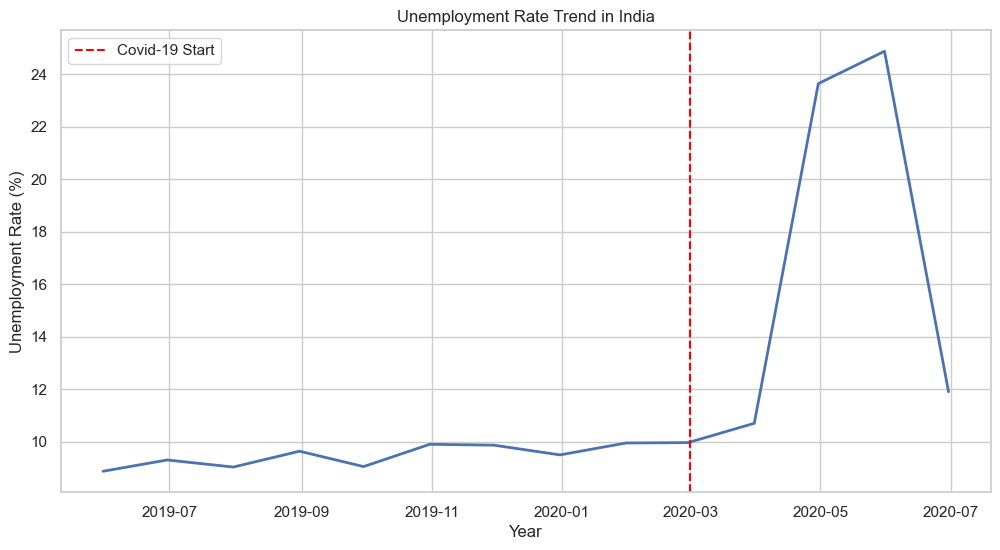

Average Unemployment Rate Before Covid: 9.51 %
Average Unemployment Rate After Covid: 17.77 %


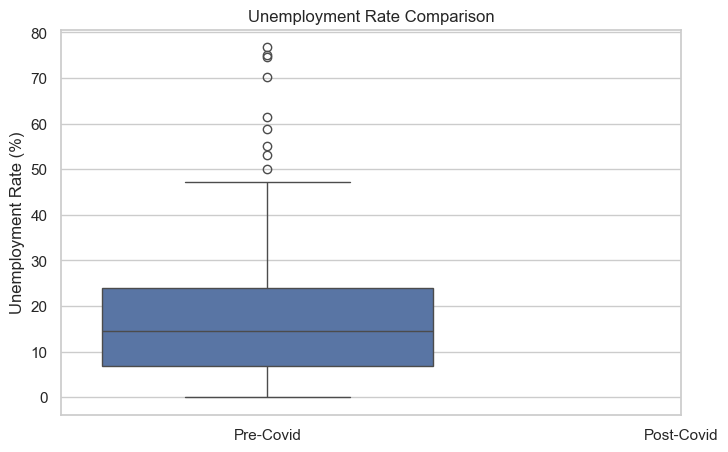

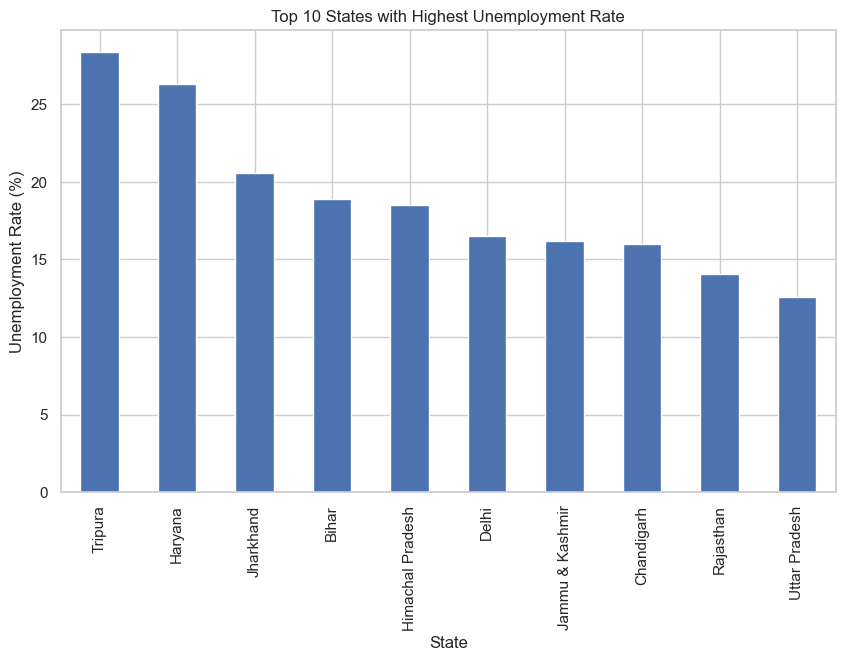

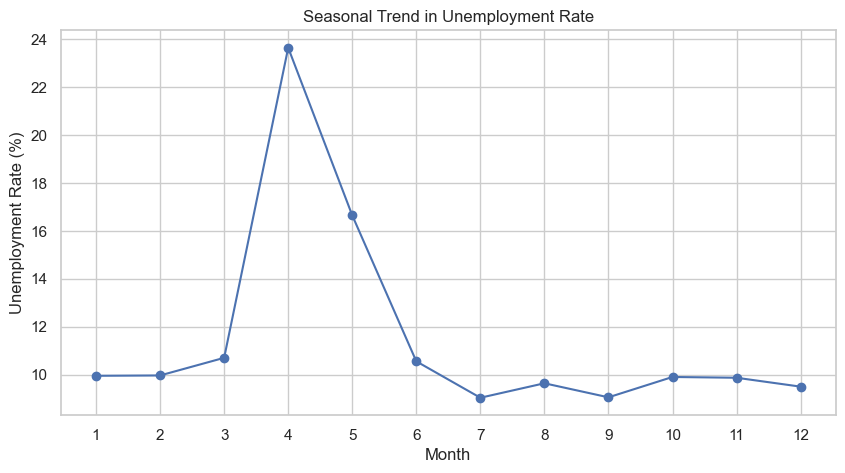


KEY INSIGHTS:
1. Unemployment rose sharply during Covid-19 lockdown.
2. Post-Covid recovery exists but instability remains.
3. Significant state-wise unemployment differences.
4. Seasonal employment patterns are visible.

POLICY IMPLICATIONS:
✔ Emergency job schemes during crises
✔ State-specific employment policies
✔ Skill development programs
✔ Strengthened social security systems



In [1]:
# ================================
# INSTALL (run once if required)
# ================================
# !pip install --upgrade kagglehub[pandas-datasets]

# ================================
# IMPORT LIBRARIES
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

sns.set(style="whitegrid")

# ================================
# LOAD DATASET FROM KAGGLE
# ================================
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "gokulrajkmv/unemployment-in-india",
    "Unemployment in India.csv"
)

print("Dataset Loaded Successfully")
print(df.head())

# ================================
# DATA CLEANING
# ================================
df.columns = [
    "State",
    "Date",
    "Frequency",
    "Estimated_Unemployment_Rate",
    "Estimated_Employed",
    "Estimated_Labour_Participation_Rate",
    "Region"
]

df["Date"] = pd.to_datetime(df["Date"])
df.dropna(inplace=True)

# ================================
# UNEMPLOYMENT RATE DISTRIBUTION
# ================================
plt.figure(figsize=(8,5))
sns.histplot(df["Estimated_Unemployment_Rate"], kde=True)
plt.title("Distribution of Unemployment Rate (%)")
plt.xlabel("Unemployment Rate (%)")
plt.show()

# ================================
# TREND OVER TIME (INDIA)
# ================================
india_trend = df.groupby("Date")["Estimated_Unemployment_Rate"].mean()

plt.figure(figsize=(12,6))
plt.plot(india_trend, linewidth=2)
plt.axvline(pd.to_datetime("2020-03-01"), color="red", linestyle="--", label="Covid-19 Start")
plt.title("Unemployment Rate Trend in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

# ================================
# COVID-19 IMPACT ANALYSIS
# ================================
pre_covid = df[df["Date"] < "2020-03-01"]
post_covid = df[df["Date"] >= "2020-03-01"]

print("Average Unemployment Rate Before Covid:",
      round(pre_covid["Estimated_Unemployment_Rate"].mean(), 2), "%")

print("Average Unemployment Rate After Covid:",
      round(post_covid["Estimated_Unemployment_Rate"].mean(), 2), "%")

plt.figure(figsize=(8,5))
sns.boxplot(data=[
    pre_covid["Estimated_Unemployment_Rate"],
    post_covid["Estimated_Unemployment_Rate"]
])
plt.xticks([0,1], ["Pre-Covid", "Post-Covid"])
plt.title("Unemployment Rate Comparison")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# ================================
# STATE-WISE ANALYSIS
# ================================
state_avg = df.groupby("State")["Estimated_Unemployment_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
state_avg.head(10).plot(kind="bar")
plt.title("Top 10 States with Highest Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# ================================
# SEASONAL TREND ANALYSIS
# ================================
df["Month"] = df["Date"].dt.month
monthly_avg = df.groupby("Month")["Estimated_Unemployment_Rate"].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(marker="o")
plt.title("Seasonal Trend in Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(range(1,13))
plt.show()

# ================================
# INSIGHTS & POLICY IMPLICATIONS
# ================================
print("""
KEY INSIGHTS:
1. Unemployment rose sharply during Covid-19 lockdown.
2. Post-Covid recovery exists but instability remains.
3. Significant state-wise unemployment differences.
4. Seasonal employment patterns are visible.

POLICY IMPLICATIONS:
✔ Emergency job schemes during crises
✔ State-specific employment policies
✔ Skill development programs
✔ Strengthened social security systems
""")
